In [15]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_pKa = {}
    for index, row in df_main.iterrows():
        SMILES = row['Smiles']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_pKa[SMILES] = row['pKa']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\train_basic.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\pKa_basicity_data\gnn_cv_canon_smiles\test_basic.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    return train_SMILES, test_SMILES, smiles_to_fold

train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [16]:
# all test
relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.459, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.096, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.182, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -1.159, 'FC1(F)CC2CNCC(C1)C2(F)F': -4.224, 'FC1(F)C2CCCC1CNC2': -2.755, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.007, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -3.593, 'FC1CCNC1': -1.666, 'FC1(F)CCNC1': -3.437, 'F[C@@H]1CNC[C@@H]1F': -3.433, 'F[C@@H]1CNC[C@H]1F': -3.433, 'FC1CCCNC1': -1.545, 'FC1(F)CCCNC1': -3.086, 'F[C@@H]1CNC[C@H](F)C1': -3.956, 'F[C@@H]1CNC[C@@H](F)C1': -3.956, 'FC1CCNCC1': -0.582, 'F[C@@H]1CCNC[C@@H]1F': -3.328, 'F[C@@H]1CCNC[C@H]1F': -3.328, 'FC(F)C1CCCCN1': -2.47, 'FC(F)C1CCCN1': -2.48, 'FC(F)(F)C1CCN1': -2.83, 'FC(F)C1CCN1': -2.632, 'NCCF': -2.195, 'FC(F)(F)C1CCCNC1': -1.022, 'FC(F)C1CCCNC1': -0.589, 'FCC1CCCNC1': -0.13, 'FC(F)C1CCNC1': -0.728, 'FCC1CCNC1': -0.187, 'FC(F)(F)C1CNC1': -1.742, 'FC(F)C1CNC1': -0.926, 'FCC1CNC1': -0.409, 'NCCC(F)F': -1.369, 'NCCCF': -0.399, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.161, 'FCC1CCNCC1': -0.063, 'NCCCCF': -0.131, 'NCCCC(F)F': -0.676, 'NCCCC(F)(F)F': -0.94, 'CCCN': 0.0, 'CCC(F)(F)CN': -2.519, 'CC(F)(F)CCN': -0.939, 'FC(F)(F)C12CCC(CN1)C2': -4.531, 'FC(F)(F)C1CCCN1': -4.729, 'FC(F)(F)C1CCCCN1': -4.476, 'FC1(F)CCNCC1': -2.957, 'FC1(F)C2CCC1CNC2': -2.715, 'FC1CNC1': -3.413, 'FCC1CCCCN1': -0.768, 'FCC1CCCN1': -0.921, 'FCC1CCN1': -0.94, 'FC(F)(F)C1CCNCC1': -1.072, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# overfit
# relevances_fluorine = {'FC(F)(F)C12CC(CN1)C2': -4.553, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.241, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.46, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -1.301, 'FC1(F)CC2CNCC(C1)C2(F)F': -4.33, 'FC1(F)C2CCCC1CNC2': -2.931, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -2.35, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.757, 'FC1CCNC1': -2.433, 'FC1(F)CCNC1': -4.396, 'F[C@@H]1CNC[C@@H]1F': -4.182, 'F[C@@H]1CNC[C@H]1F': -4.182, 'FC1CCCNC1': -2.464, 'FC1(F)CCCNC1': -4.317, 'F[C@@H]1CNC[C@H](F)C1': -4.638, 'F[C@@H]1CNC[C@@H](F)C1': -4.638, 'FC1CCNCC1': -2.068, 'F[C@@H]1CCNC[C@@H]1F': -4.096, 'F[C@@H]1CCNC[C@H]1F': -4.096, 'FC(F)C1CCCCN1': -3.138, 'FC(F)C1CCCN1': -3.442, 'FC(F)(F)C1CCN1': -5.305, 'FC(F)C1CCN1': -3.407, 'NCCF': -1.925, 'FC(F)(F)C1CCCNC1': -2.143, 'FC(F)C1CCCNC1': -1.539, 'FCC1CCCNC1': -0.831, 'FC(F)C1CCNC1': -1.505, 'FCC1CCNC1': -0.828, 'FC(F)(F)C1CNC1': -2.565, 'FC(F)C1CNC1': -1.662, 'FCC1CNC1': -1.15, 'NCCC(F)F': -1.722, 'NCCCF': -0.696, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.929, 'FCC1CCNCC1': -0.663, 'NCCCCF': 0.306, 'NCCCC(F)F': -0.083, 'NCCCC(F)(F)F': -0.321, 'CCCN': 0.0, 'CCC(F)(F)CN': -2.912, 'CC(F)(F)CCN': -0.935, 'FC(F)(F)C12CCC(CN1)C2': -4.417, 'FC(F)(F)C1CCCN1': -5.172, 'FC(F)(F)C1CCCCN1': -4.788, 'FC1(F)CCNCC1': -3.349, 'FC1(F)C2CCC1CNC2': -3.021, 'FC1CNC1': -2.657, 'FCC1CCCCN1': -1.557, 'FCC1CCCN1': -1.709, 'FCC1CCN1': -1.553, 'FC(F)(F)C1CCNCC1': -1.535, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}


cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

In [17]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [18]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    # is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

FC(F)(F)C12CC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1NC2CC1C2 () non-F inf
C1CCNC1 () non-F inf
CC12CC(CN1)C2 () non-F inf
FC(F)(F)C12CCC(CC1)CN2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CC1CN2 () non-F inf
C1CC2CCC1CN2 () non-F inf
C1CCNCC1 () non-F inf
FC(F)(F)C12CCCC(CN1)C2 ((4, 1, 0, 2, 3),) CF3 1
C1CC2CNC(C1)C2 () non-F inf
FC1(F)CC2CNCC(C2)C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CC2CNCC(C1)C2(F)F ((1, 0), (1, 2), (10, 11), (10, 12)) gem-CF2 3
FC1(F)C2CCCC1CNC2 ((1, 0), (1, 2)) gem-CF2 3
C1CC2CNCC(C1)C2 () non-F inf
FC1(F)C2CNCC1COC2 ((1, 0), (1, 2)) gem-CF2 3
C1NCC2COCC1C2 () non-F inf
C1CC2CNCC1C2 () non-F inf
C1CNC1 () non-F inf
FC1(F)CNC1 ((1, 0), (1, 2)) gem-CF2 2
FC1CCNC1 ((1, 0),) CHF 2
FC1(F)CCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@@H]1F ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@H]1F ((1, 0), (5, 6)) CHF 2
FC1CCCNC1 ((1, 0),) CHF 2
FC1(F)CCCNC1 ((1, 0), (1, 2)) gem-CF2 2
F[C@@H]1CNC[C@H](F)C1 ((1, 0), (5, 6)) CHF 2
F[C@@H]1CNC[C@@H](F)C1 ((1, 0), (5, 6)) CHF 2
FC1CCNCC1 ((1, 0),) CHF 3
F[C@@

['CH2F', 'CHF2', 'CF3'] [-0.94, -2.632, -2.83]
['CH2F', 'CHF2', 'CF3'] [-0.921, -2.48, -4.729]
['CH2F', 'CHF2', 'CF3'] [-0.768, -2.47, -4.476]
['CH2F'] [-2.195]
['CH2F', 'CHF2', 'CF3'] [[-0.94, -0.921, -0.768, -2.195], [-2.632, -2.48, -2.47], [-2.83, -4.729, -4.476]]


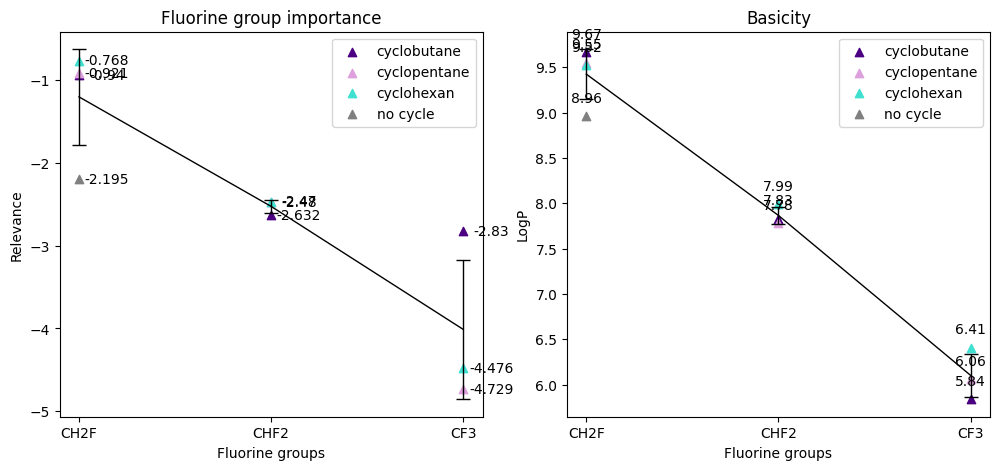

['CH2F', 'CHF2', 'CF3'] [-0.409, -0.926, -1.742]
['CH2F', 'CHF2'] [-0.187, -0.728]
['CH2F', 'CHF2', 'CF3'] [-0.13, -0.589, -1.022]
['CH2F', 'CHF2'] [-0.399, -1.369]
['CH2F', 'CHF2', 'CF3'] [[-0.409, -0.187, -0.13, -0.399], [-0.926, -0.728, -0.589, -1.369], [-1.742, -1.022]]


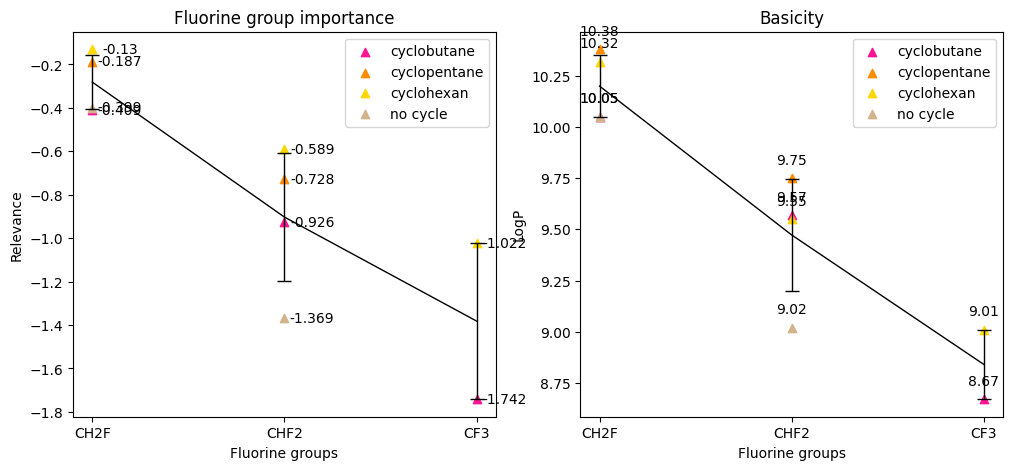

['CH2F', 'CHF2', 'CF3'] [-0.063, -0.161, -1.072]
['CH2F', 'CHF2', 'CF3'] [-0.131, -0.676, -0.94]
['CH2F', 'CHF2', 'CF3'] [[-0.063, -0.131], [-0.161, -0.676], [-1.072, -0.94]]


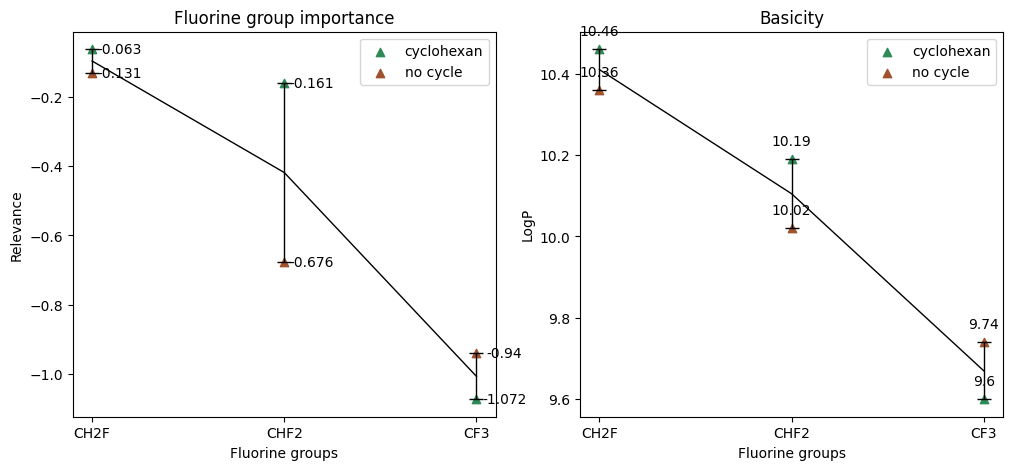

In [19]:
import matplotlib.pyplot as plt
import numpy as np

cyclobutane_color = {1: 'indigo', 2: 'deeppink'}
cyclopentane_color = {1: 'plum', 2: 'darkorange'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
methane_name = 'no cycle'

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Basicity")

    plt.show()
    
    


primary amines

In [20]:
# all test (3 models)
relevances_fluorine = {'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.416, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.416, 'NC1CCC(F)(F)CC1': -1.047, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'NC1(C(F)(F)F)CCC1': -3.634, 'NC1(C(F)F)CCC1': -3.264, 'NC1(CF)CCC1': -2.437, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.648, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.104, 'N[C@H]1C[C@H](C(F)F)C1': -0.942, 'N[C@H]1C[C@@H](C(F)F)C1': -1.198, 'N[C@H]1C[C@H](CF)C1': -0.915, 'N[C@H]1C[C@@H](CF)C1': -0.915, 'NCCF': -2.183, 'NCCC(F)F': -1.528, 'NCCCF': -0.784, 'CCN': 0.0, 'NCCCCF': -0.131, 'NCCCC(F)F': -0.676, 'NCCCC(F)(F)F': -0.94, 'CCCN': 0.0, 'NC1CCC1(F)F': -2.803, 'NC1CC(F)(F)C1': -1.664, 'NC1CCCCC1(F)F': -2.505, 'NC1CCCC(F)(F)C1': -1.278, 'NC1CCCCCC1(F)F': -2.776, 'NC1CCCCC(F)(F)C1': -1.007, 'NC1CCCC(F)(F)CC1': -1.194, 'CCC(F)(F)CN': -3.497, 'CC(F)(F)CCN': -0.939, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.852, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.101, 'N[C@@H]1CC[C@H]1CF': -1.677, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.183, 'N[C@H]1C[C@H]1C(F)(F)F': -2.3, 'N[C@@H]1C[C@H]1C(F)F': -2.109, 'N[C@H]1C[C@H]1C(F)F': -1.461, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'NC1CC12CC2(F)F': -1.873, 'NC1CCCC1(F)F': -2.836, 'NC1CCC(F)(F)C1': -1.647, 'N[C@@H]1CC[C@H]1C(F)F': -1.665, 'C[C@@H]1C[C@@H]1N': 0.0, 'NC1CC2(C1)CC(F)C2': -0.176, 'CCCCN': 0.0}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [21]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
N[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((6, 7), (6, 8)) gem-CF2 4
NC1CCC(F)(F)CC1 ((4, 5), (4, 6)) gem-CF2 4
NC1CCCCC1 () non-F inf
N[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
N[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf
NC1(C(F)(F)F)CCC1 ((1, 2, 3, 4, 5),) CF3 1
NC1(C(F)F)CCC1 ((1, 2, 3, 4),) CHF2 1
NC1(CF)CCC1 ((1, 2, 3),) CH2F 1
NC1CCC1 () non-F inf
N[C@H]1C[C@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@@H](C(F)(F)F)C1 ((3, 4, 5, 6, 7),) CF3 3
N[C@H]1C[C@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@@H](C(F)F)C1 ((3, 4, 5, 6),) CHF2 3
N[C@H]1C[C@H](CF)C1 ((3, 4, 5),) CH2F 3
N[C@H]1C[C@@H](CF)C1 ((3, 4, 5),) CH2F 3
NCCF ((1, 2, 3),) CH2F 1
NCCC(F)F ((2, 3, 4, 5),) CHF2 2
NCCCF ((2, 3, 4),) CH2F 2
CCN () non-F inf
NCCCCF ((3, 4, 5),) CH2F 3
NCCCC(F)F ((3, 4, 5, 6),) CHF2 3
NCCCC(F)(F)F ((3, 4, 5, 6, 7),) CF3 3
CCCN () non-F inf
NC1CCC1(F)F ((4, 5), (4, 6)) gem-CF2 2
NC1CC(F)(F)C1 ((3, 4), (3, 5)) gem-CF2 3
NC1CCCCC1(F)F ((6, 7), (6, 8)) 

cyclobutane CF3 NC1(C(F)(F)F)CCC1 5.0 -3.634
cyclobutane CHF2 NC1(C(F)F)CCC1 6.62 -3.264
cyclobutane CH2F NC1(CF)CCC1 8.1 -2.437
methane CH2F NCCF 8.96 -2.183
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-2.437, -3.264, -3.634]
cyclopropane [] []
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F'] [-2.183]
['CH2F', 'CHF2', 'CF3'] [[-2.437, -2.183], [-3.264], [-3.634]]
CH2F 8.530000000000001
CHF2 6.62
CF3 5.0


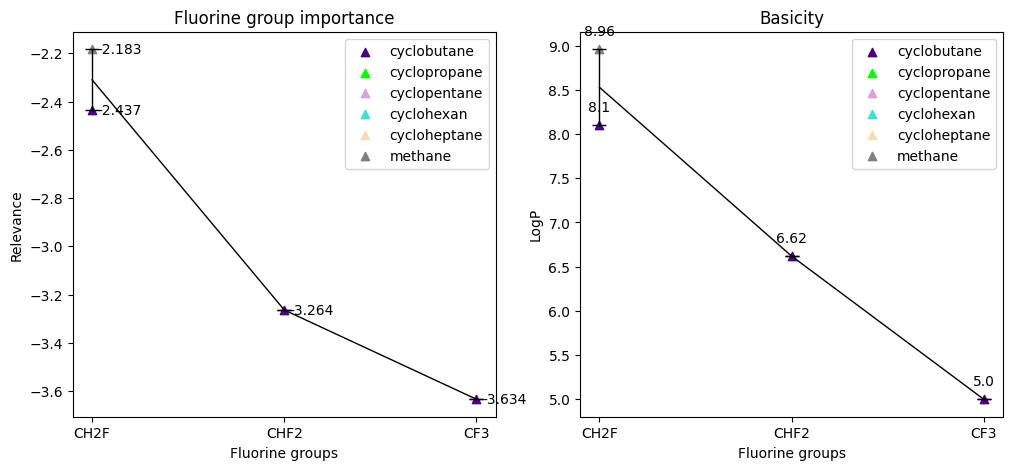

methane CHF2 NCCC(F)F 9.02 -1.528
methane CH2F NCCCF 10.05 -0.784
cyclobutane gem-CF2 NC1CCC1(F)F 7.2 -2.803
cyclohexane gem-CF2 NC1CCCCC1(F)F 7.45 -2.505
cyclohexane gem-CF2 NC1CCCCCC1(F)F 8.13 -2.776
methane gem-CF2 CCC(F)(F)CN 7.59 -3.497
cyclobutane CF3 N[C@@H]1CC[C@H]1C(F)(F)F 7.95 -2.101
cyclobutane CH2F N[C@@H]1CC[C@H]1CF 9.32 -1.677
cyclopropane CF3 N[C@@H]1C[C@H]1C(F)(F)F 7.18 -2.183
cyclopropane CF3 N[C@H]1C[C@H]1C(F)(F)F 6.92 -2.3
cyclopropane CHF2 N[C@@H]1C[C@H]1C(F)F 7.76 -2.109
cyclopropane CHF2 N[C@H]1C[C@H]1C(F)F 7.16 -1.461
cyclopentane gem-CF2 NC1CCCC1(F)F 7.54 -2.836
cyclobutane CHF2 N[C@@H]1CC[C@H]1C(F)F 8.98 -1.665
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-1.677, -1.665, -2.101]
cyclopropane ['CHF2', 'CF3'] [-1.461, -2.3]
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2'] [-0.784, -1.528]
['CH2F', 'CHF2', 'CF3'] [[-1.677, -0.784], [-1.665, -1.461, -1.528], [-2.101, -2.3]]
CH2F 9.685
CHF2 8.386666666666667
CF3 7.4350000000000005


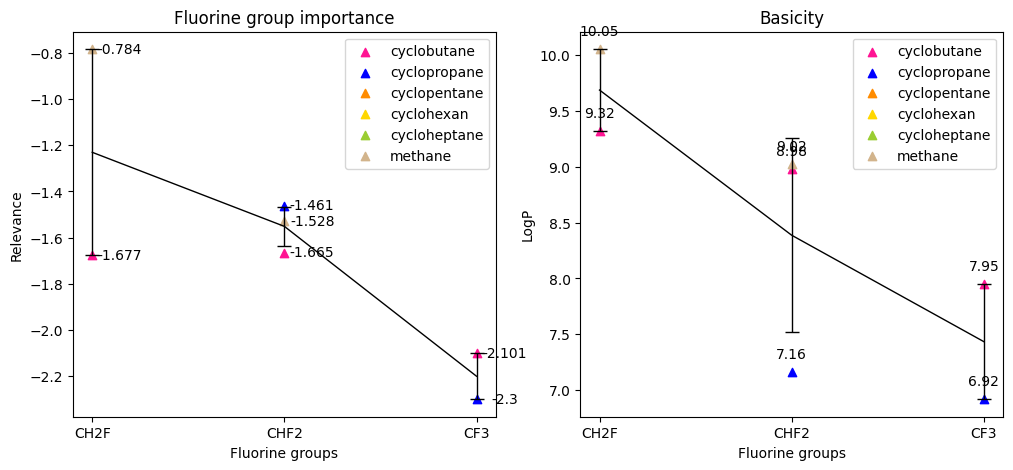

cyclobutane CF3 N[C@H]1C[C@H](C(F)(F)F)C1 8.74 -1.648
cyclobutane CF3 N[C@H]1C[C@@H](C(F)(F)F)C1 8.6 -1.104
cyclobutane CHF2 N[C@H]1C[C@H](C(F)F)C1 9.17 -0.942
cyclobutane CHF2 N[C@H]1C[C@@H](C(F)F)C1 9.04 -1.198
cyclobutane CH2F N[C@H]1C[C@H](CF)C1 9.58 -0.915
cyclobutane CH2F N[C@H]1C[C@@H](CF)C1 9.48 -0.915
methane CH2F NCCCCF 10.36 -0.131
methane CHF2 NCCCC(F)F 10.02 -0.676
methane CF3 NCCCC(F)(F)F 9.74 -0.94
cyclobutane gem-CF2 NC1CC(F)(F)C1 8.37 -1.664
cyclohexane gem-CF2 NC1CCCC(F)(F)C1 9.12 -1.278
cyclohexane gem-CF2 NC1CCCCC(F)(F)C1 9.35 -1.007
methane gem-CF2 CC(F)(F)CCN 9.57 -0.939
cyclopentane gem-CF2 NC1CCC(F)(F)C1 8.83 -1.647
cyclobutane ['CH2F', 'CHF2', 'CF3'] [-0.915, -1.198, -1.104]
cyclopentane [] []
cyclohexan [] []
cycloheptane [] []
methane ['CH2F', 'CHF2', 'CF3'] [-0.131, -0.676, -0.94]
['CH2F', 'CHF2', 'CF3'] [[-0.915, -0.131], [-1.198, -0.676], [-1.104, -0.94]]
CH2F 9.92
CHF2 9.53
CF3 9.17


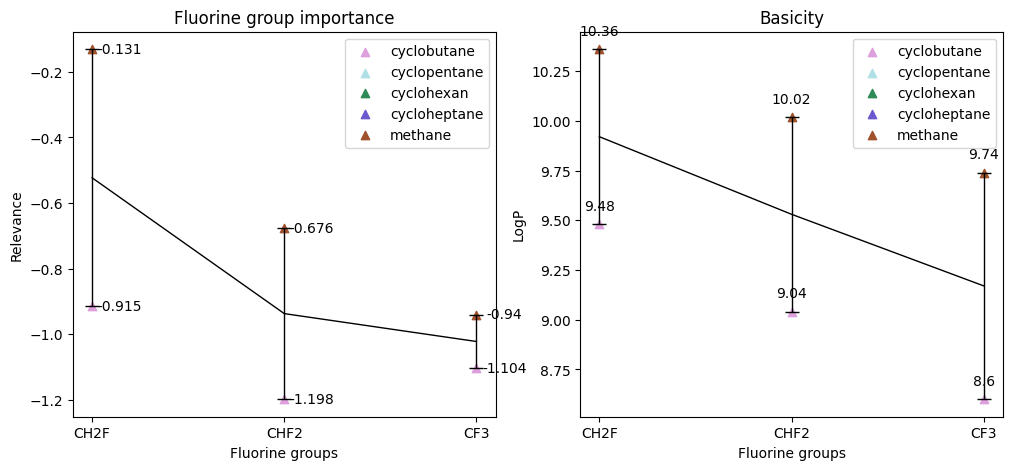

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna', 4: 'blue'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(label, X_local, y_relevance)
        # lists = sorted(zip(*[X_local, y_relevance]))
        # new_x, new_y = list(zip(*lists))
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        print(X[i], mean_logP_Y[i])
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Basicity")

    plt.show()
    
    


--------

--------

--------

--------

--------

ACIDIC SME

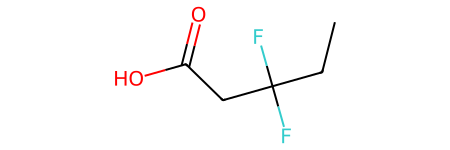

In [23]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CCC(F)(F)CC(=O)O')

mol

In [29]:
relevances_fluorine = {'O=C(O)C1CCC(F)(F)CC1': -0.242, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.293, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.293, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -1.221, 'O=C(O)C1(C(F)F)CCC1': -1.168, 'O=C(O)C1(C(F)(F)F)CCC1': -1.424, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.78, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.669, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.629, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.63, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.58, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.58, 'O=C(O)C1CC1(F)F': -1.487, 'O=C(O)C1CCC1(F)F': -1.105, 'O=C(O)C1CC(F)(F)C1': -1.297, 'O=C(O)C1CCCC1(F)F': -1.047, 'O=C(O)C1CCC(F)(F)C1': -0.613, 'O=C(O)C1CCCCC1(F)F': -0.947, 'O=C(O)C1CCCCCC1(F)F': -1.043, 'O=C(O)C1CCCCC(F)(F)C1': -0.494, 'O=C(O)C1CCCC(F)(F)CC1': -0.194, 'CCC(F)(F)CC(=O)O': -1.139, 'CC(F)(F)CCC(=O)O': -0.69, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.132, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.383, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.136, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.11, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -1.025, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -1.025, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.557, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.885, 'O=C(O)[C@@H]1C[C@H]1CF': -0.747, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -1.041, 'O=C(O)C1CC12CC2(F)F': -0.787, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.619, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.02, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.163}

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_pKa = prepare_data()
train_SMILES, test_SMILES, smiles_to_fold = train_test_smiles_data()

In [30]:
def find_the_closest_oxygen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'o':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance - 2

In [31]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_oxygen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(O)C1CCC(F)(F)CC1 ((6, 7), (6, 8)) gem-CF2 3 cyclohexane
O=C(O)C1CCCCC1 () non-F inf cyclohexane
O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F ((8, 9), (8, 10)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(O)C1CCC1 () non-F inf cyclobutane
O=C(O)C1(CF)CCC1 ((3, 4, 5),) CH2F 0 cyclobutane
O=C(O)C1(C(F)F)CCC1 ((3, 4, 5, 6),) CHF2 0 cyclobutane
O=C(O)C1(C(F)(F)F)CCC1 ((3, 4, 5, 6, 7),) CF3 0 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 ((5, 6, 7, 8, 9),) CF3 2 cyclobutane
O=C(O)[C@H]1C[C@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@@H](C(F)F)C1 ((5, 6, 7, 8),) CHF2 2 cyclobutane
O=C(O)[C@H]1C[C@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)[C@H]1C[C@@H](CF)C1 ((5, 6, 7),) CH2F 2 cyclobutane
O=C(O)C1CC1(F)F ((5, 6), (5, 7)) gem-CF2 1 cyclopropane
O=C(O)C1CCC1(F)F ((6, 7), (

cyclopropane gem-CF2 O=C(O)C1CC1(F)F 3.25 -1.487
cyclobutane gem-CF2 O=C(O)C1CCC1(F)F 3.62 -1.105
cyclopentane gem-CF2 O=C(O)C1CCCC1(F)F 3.76 -1.047
cyclohexane gem-CF2 O=C(O)C1CCCCC1(F)F 3.81 -0.947
cyclohexane gem-CF2 O=C(O)C1CCCCCC1(F)F 3.78 -1.043
methane gem-CF2 CCC(F)(F)CC(=O)O 3.55 -1.139
cyclobutane CF3 O=C(O)[C@@H]1CC[C@H]1C(F)(F)F 3.87 -0.383
cyclobutane CHF2 O=C(O)[C@@H]1CC[C@H]1C(F)F 4.26 -0.136
cyclobutane CH2F O=C(O)[C@@H]1CC[C@H]1CF 4.38 -0.11
cyclopropane CF3 O=C(O)[C@@H]1C[C@H]1C(F)(F)F 3.88 -1.025
cyclopropane CF3 O=C(O)[C@H]1C[C@H]1C(F)(F)F 3.76 -1.025
cyclopropane CHF2 O=C(O)[C@@H]1C[C@H]1C(F)F 4.18 -0.557
cyclopropane CHF2 O=C(O)[C@H]1C[C@H]1C(F)F 4.17 -0.885
cyclopropane CH2F O=C(O)[C@@H]1C[C@H]1CF 4.35 -0.747
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
['CH2F', 'CHF2', 'CF3'] [-0.747, -0.885, -1.025]
['CH2F', 'CHF2', 'CF3'] [-0.11, -0.136, -0.383]
[] []
[] []
[] []
[] []
['CH2F', 'CHF2', 'CF3'] [[-0.747, -0.11], [-0.885, -0.136], [-1.025, -0.383]]


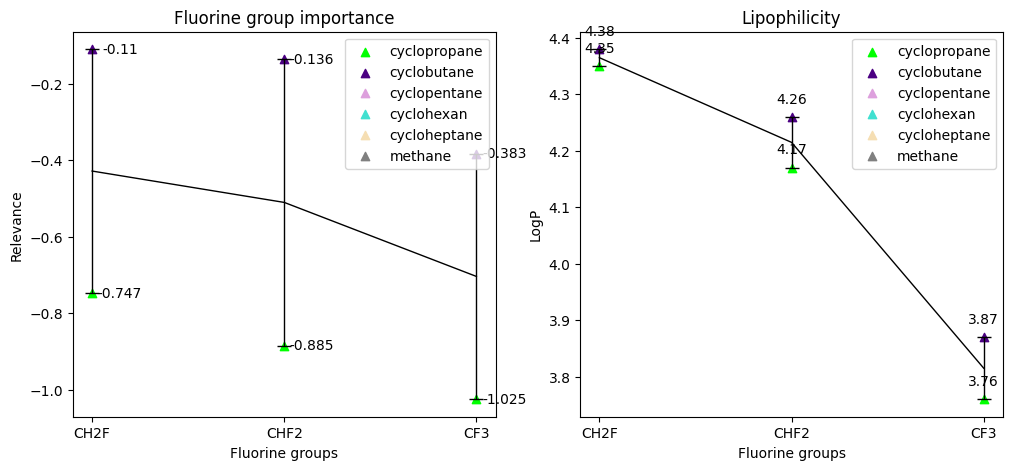

cyclobutane CF3 O=C(O)[C@H]1C[C@H](C(F)(F)F)C1 3.83 -0.78
cyclobutane CF3 O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1 3.88 -0.669
cyclobutane CHF2 O=C(O)[C@H]1C[C@H](C(F)F)C1 4.11 -0.629
cyclobutane CHF2 O=C(O)[C@H]1C[C@@H](C(F)F)C1 3.92 -0.63
cyclobutane CH2F O=C(O)[C@H]1C[C@H](CF)C1 4.18 -0.58
cyclobutane CH2F O=C(O)[C@H]1C[C@@H](CF)C1 4.12 -0.58
cyclobutane gem-CF2 O=C(O)C1CC(F)(F)C1 4.02 -1.297
cyclopentane gem-CF2 O=C(O)C1CCC(F)(F)C1 3.98 -0.613
cyclohexane gem-CF2 O=C(O)C1CCCCC(F)(F)C1 4.09 -0.494
methane gem-CF2 CC(F)(F)CCC(=O)O 4.17 -0.69
cyclohexane gem-CF2 O=C(O)C1CCCC(F)(F)C1 4.18 -0.619
methane CHF2 O=C(O)CCCC(F)F 4.38 -0.163
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
[] []
['CH2F', 'CHF2', 'CF3'] [-0.58, -0.63, -0.669]
[] []
[] []
[] []
['CHF2'] [-0.163]
['CH2F', 'CHF2', 'CF3'] [[-0.58], [-0.63, -0.163], [-0.669]]


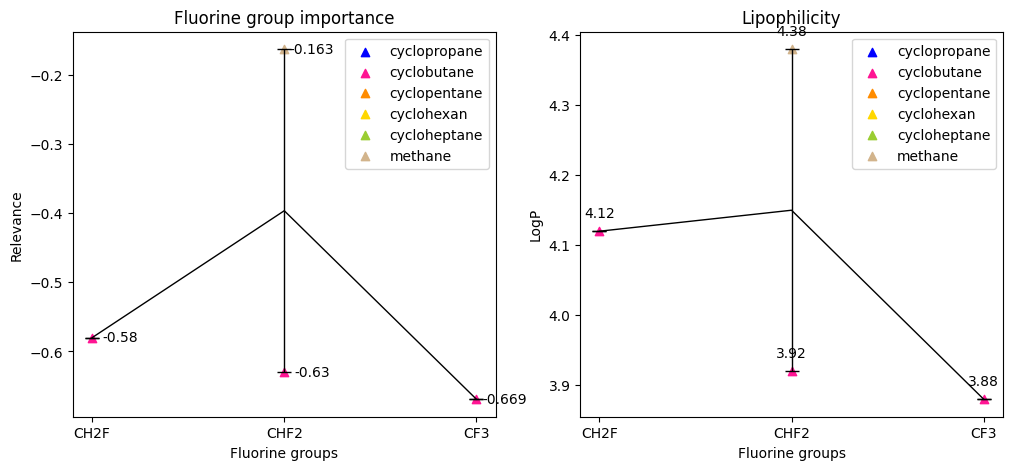

cyclohexane gem-CF2 O=C(O)C1CCC(F)(F)CC1 4.32 -0.242
cyclohexane gem-CF2 O=C(O)C1CCCC(F)(F)CC1 4.36 -0.194
Y_logP_dict {'CH2F': [], 'CHF2': [], 'CF3': []}
[] []
[] []
[] []
[] []
[] []
[] []


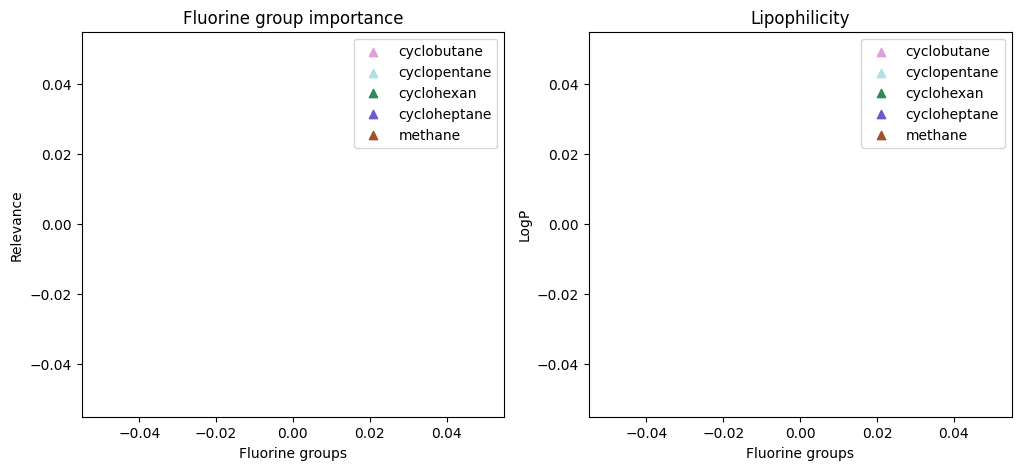

In [32]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'lime', 2: 'blue'}
cyclobutane_color = {1: 'indigo', 2: 'deeppink', 3: 'plum'}
cyclopentane_color = {1: 'plum', 2: 'darkorange', 3: 'powderblue'}
cyclohexan_color = {1: 'turquoise', 2: 'gold', 3: 'seagreen', 4: 'salmon'}
cycloheptane_color = {1: 'wheat', 2: 'yellowgreen', 3: 'slateblue', 4: 'sandybrown'}
methane_color = {1: 'grey', 2: 'tan', 3: 'sienna'}

cyclopropane_name = 'cyclopropane'
cyclobutane_name = 'cyclobutane'
cyclopentane_name = 'cyclopentane'
cyclohexan_name = 'cyclohexan'
cycloheptane_name = 'cycloheptane'
methane_name = 'methane'

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

for distance_global in range(1, 4):
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
    
    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_pKa[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_pKa[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_pKa[SMILES]]
            print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("Y_logP_dict", Y_logP_dict)
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(20, -3), textcoords='offset points', ha='center')
        ax1.legend()

        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label)
        for i in range(len(X_local)):
            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(0, 10), textcoords='offset points', ha='center')
        ax2.legend()
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax1.set_xlabel("Fluorine groups")
    ax1.set_ylabel("Relevance")
    ax1.set_title("Fluorine group importance")

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.plot(X, mean_logP_Y, linestyle='-', color="black", label=label, linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color='black', capsize=5, elinewidth=1, markeredgewidth=1)
    ax2.set_xlabel("Fluorine groups")
    ax2.set_ylabel("LogP")
    ax2.set_title("Lipophilicity")

    plt.show()
    
    


In [28]:
logP_dict

{1: {'gem-CF2': [3.55]}, 2: {'gem-CF2': [4.17], 'CHF2': [4.38]}, 3: {}}